## Prepare train_data and test_data

In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from hypergbm import make_experiment
from hypernets.tabular.metrics import metric_to_scoring
from sklearn.metrics import get_scorer

07-20 19:03:25 I hypernets.u._fsutils.py 300 - use /home/wumy/tmp/workdir as working directory.


In [2]:
datasets_root_path = './../../resource/datasets/binary/Magic'
train_data = pd.read_csv('{}/train.csv'.format(datasets_root_path))
test_data = pd.read_csv('{}/test.csv'.format(datasets_root_path))
X_train = train_data.copy()
y_train = X_train.pop('Class')
X_test = test_data.copy()
y_test = X_test.pop('Class')

# Without pseudo_labeling
### _best_reward is 0.6666

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


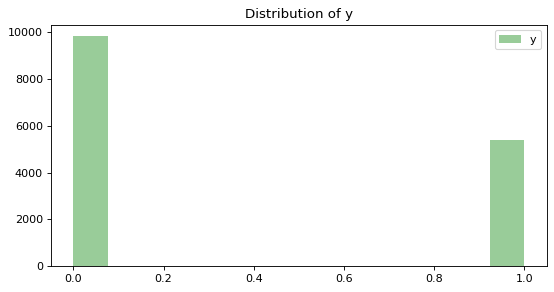

07-20 19:03:26 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.9706250943467045, 'n_features': 10,..."
4,scores,"{'FLength': 0.5351110121307476, 'FWidth': 0.53..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.633794,25,0.857988,50.40941,30,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,25,0.857988,1.712695,"[2, 1, 0, 3, 2, 4]"
1,19,0.856016,1.734174,"[2, 3, 0, 3, 2, 3]"
2,17,0.854701,1.183634,"[2, 3, 0, 3, 1, 1]"
3,15,0.850099,5.702768,"[2, 2, 1, 3, 3, 4, 0]"
4,24,0.848126,0.788588,"[0, 1, 0, 2, 310, 1, 3, 2, 3]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 1, 0, 3, 2, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,30


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.877169,10,0.877169,35.393198,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,10,0.877169,3.352923,"[2, 2, 0, 2, 0, 2]"
1,3,0.858767,1.711292,"[0, 3, 1, 2, 210, 3, 3, 5, 4, 0]"
2,9,0.855744,2.836230,"[0, 3, 0, 2, 265, 1, 1, 4, 3]"
3,8,0.852589,10.640780,"[1, 1, 0, 3, 0, 1, 2, 0, 0, 2]"
4,5,0.846872,0.975557,"[0, 2, 1, 0, 270, 2, 3, 5, 2, 4]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 2, 0, 2, 0, 2]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,3
5-Module_CatBoostEstimator_1.l2_leaf_reg,10


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,best_reward,0.857584
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.6, 0.0, 0.35, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0..."
1,scores,"[0.8763406940063091, 0.8764458464773922, 0.876..."
2,best_stack,"[0, 2, 0, 0, 2, 0, 0, 2, 6, 0, 2, 0, 2, 0, 0, ..."
3,hits,"{0: 12, 2: 7, 6: 1}"
4,ensemble_size,20


In [3]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(),target='Class',
                             random_state=8888,cv=True,early_stopping_rounds=0,
                             max_trials=10)
estimator = experiment.run()

In [4]:
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score

0.6666666666666666

# Use pseudo_labeling
 ###   _best_reward is 0.7812

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


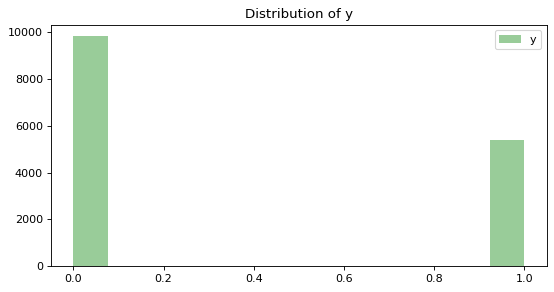

07-20 19:04:54 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.9706250943467045, 'n_features': 10,..."
4,scores,"{'FLength': 0.5351110121307476, 'FWidth': 0.53..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.633794,15,0.857331,82.574977,29,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,15,0.857331,5.615132,"[2, 1, 0, 2, 3, 4]"
1,7,0.850099,0.481040,"[1, 0, 0, 0, 3, 0, 2, 0, 0, 1]"
2,6,0.848126,0.930498,"[2, 2, 1, 3, 0, 2, 0]"
3,21,0.848126,5.409468,"[2, 1, 0, 2, 3, 3]"
4,23,0.848126,1.768209,"[2, 2, 0, 1, 2, 1]"


#### Best Trial:

key,value
signature,1eda647a850f9867b0cdd8fddfa2c686
vectors,"[2, 1, 0, 2, 3, 4]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,median
2-numeric_scaler_optional_0.hp_opt,False
3-Module_CatBoostEstimator_1.learning_rate,0.5
4-Module_CatBoostEstimator_1.depth,10
5-Module_CatBoostEstimator_1.l2_leaf_reg,30


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.831033,3,0.85903,36.662247,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,3,0.859030,1.622577,"[0, 2, 0, 2, 180, 3, 3, 5, 4]"
1,5,0.840694,6.239513,"[1, 3, 0, 3, 1, 1, 2, 1, 5, 2]"
2,1,0.839248,3.539557,"[1, 0, 1, 1, 1, 0, 2, 1, 5, 4, 0]"
3,9,0.831033,4.275815,"[2, 2, 1, 0, 1, 1, 0]"
4,10,0.831033,4.278453,"[2, 3, 0, 0, 1, 1]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 2, 0, 2, 180, 3, 3, 5, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,goss
4-Module_LightGBMEstimator_1.num_leaves,180
5-Module_LightGBMEstimator_1.max_depth,10
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,100


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,best_reward,0.857584
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Pseudo Labeling

### Initliazed parameters

,key,value
0,estimator_builder__ensemble_size,20
1,estimator_builder__name,ensemble
2,estimator_builder__scorer,make_scorer(accuracy_score)
3,estimator_builder,"EnsembleStep(ensemble_size=20, name='ensemble'..."
4,name,pseudo_labeling
5,proba_quantile,0.9
6,proba_threshold,0.5
7,random_state,8888
8,resplit,False
9,sample_number,0.9


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,test_proba,"[[0.658865612651898, 0.34113438734810203], [0...."
2,pseudo_label_stat,"{0: 2365, 1: 1439}"


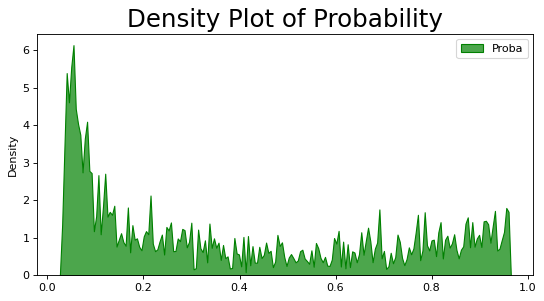

## Two Stage Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,two_stage_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.647839,14,0.872622,82.073979,29,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,14,0.872622,0.562994,"[0, 0, 1, 0, 190, 2, 3, 4, 0, 3]"
1,27,0.871470,1.036315,"[2, 3, 0, 2, 0, 0]"
2,13,0.869741,1.325885,"[2, 3, 1, 2, 1, 3, 4]"
3,19,0.869164,5.768906,"[2, 0, 1, 1, 3, 3, 2]"
4,17,0.868588,5.807626,"[2, 1, 1, 1, 3, 0, 3]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 0, 1, 0, 190, 2, 3, 4, 0, 3]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,mean
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,gbdt
4-Module_LightGBMEstimator_1.num_leaves,190
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,10


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.865176,2,0.869094,34.14504,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,0.869094,0.811033,"[1, 3, 0, 2, 2, 1, 3, 1, 5, 3]"
1,9,0.869037,7.291385,"[1, 0, 1, 2, 0, 1, 1, 0, 0, 4, 3]"
2,10,0.865176,5.884580,"[1, 0, 0, 3, 0, 0, 1, 1, 4, 3]"
3,4,0.852270,2.398723,"[0, 3, 1, 2, 345, 2, 1, 5, 1, 1]"
4,7,0.826170,2.232117,"[1, 0, 0, 0, 0, 0, 3, 0, 1, 2]"


#### Best Trial:

key,value
signature,efa0b027dff5f7cb032664969d49ae84
vectors,"[1, 3, 0, 2, 2, 1, 3, 1, 5, 3]"
0-estimator_options.hp_or,1
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_XGBoostEstimator_1.max_depth,7
4-Module_XGBoostEstimator_1.learning_rate,0.5
5-Module_XGBoostEstimator_1.booster,dart
6-Module_XGBoostEstimator_1.gamma,2
7-Module_XGBoostEstimator_1.min_child_weight,5


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,best_reward,0.876341
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.6, 0.0, 0.35, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0..."
1,scores,"[0.8763406940063091, 0.8764458464773922, 0.876..."
2,best_stack,"[0, 2, 0, 0, 2, 0, 0, 2, 6, 0, 2, 0, 2, 0, 0, ..."
3,hits,"{0: 12, 2: 7, 6: 1}"
4,ensemble_size,20


0.7812828601472135

In [5]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='Class',
                             random_state=8888,max_trials=10,cv=True,early_stopping_rounds=0,
                             pseudo_labeling=True,
                             )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score

#  Set more params of pseudo_labeling
### _best_reward is 0.7789

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(15216, 10)","(15216,)",None,None,"(3804, 11)",binary(2)


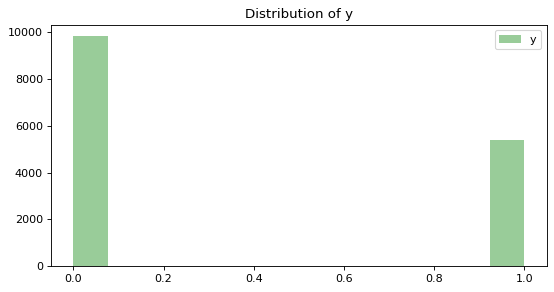

07-20 19:08:52 W hypernets.e.compete.py 1167 - X_train['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist'] and X_test['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist', 'Class'] have different columns before data_clean, try fix it.


## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,random_state,8888
4,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
2,unselected_features,[]
3,X_train.shape,"(15216, 10)"
4,y_train.shape,"(15216,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,"(3804, 10)"
8,unselected_reason,{}
9,kept/dropped feature count,10/0


## Drift Detection

### Initliazed parameters

,key,value
0,min_features,10
1,name,drift_detection
2,num_folds,5
3,remove_shift_variable,True
4,remove_size,0.1
5,threshold,0.7
6,variable_shift_threshold,0.7


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,selected_features,None
2,unselected_features,None
3,history,"[{'auc': 0.9706250943467045, 'n_features': 10,..."
4,scores,"{'FLength': 0.5351110121307476, 'FWidth': 0.53..."


## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,space_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,30,0.845496,23,0.854701,56.923527,30,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,23,0.854701,1.264968,"[2, 2, 1, 3, 1, 1, 1]"
1,16,0.850756,1.256645,"[2, 0, 0, 3, 1, 3]"
2,21,0.850099,5.728651,"[2, 1, 0, 3, 3, 1]"
3,2,0.849441,5.673825,"[2, 2, 0, 3, 3, 4]"
4,19,0.848784,5.696937,"[2, 0, 1, 1, 3, 0, 2]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 2, 1, 3, 1, 1, 1]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,constant
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.1
4-Module_CatBoostEstimator_1.depth,5
5-Module_CatBoostEstimator_1.l2_leaf_reg,2
6-numeric_or_scaler_0.hp_or,1


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.836751,9,0.857584,36.58295,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,9,0.857584,0.564511,"[0, 3, 0, 2, 45, 1, 2, 1, 1]"
1,1,0.841811,6.317203,"[1, 2, 1, 3, 1, 1, 1, 1, 5, 2, 1]"
2,5,0.840891,5.078956,"[1, 0, 0, 2, 0, 1, 1, 2, 4, 2]"
3,10,0.836751,3.226385,"[2, 1, 0, 1, 0, 1]"
4,8,0.835568,3.448142,"[2, 2, 1, 1, 0, 3, 0]"


#### Best Trial:

key,value
signature,541efd857751b207e901868fb0bc398b
vectors,"[0, 3, 0, 2, 45, 1, 2, 1, 1]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,False
3-Module_LightGBMEstimator_1.boosting_type,goss
4-Module_LightGBMEstimator_1.num_leaves,45
5-Module_LightGBMEstimator_1.max_depth,5
6-Module_LightGBMEstimator_1.learning_rate,0.5
7-Module_LightGBMEstimator_1.reg_alpha,0.01


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,best_reward,0.857584
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Pseudo Labeling

### Initliazed parameters

,key,value
0,estimator_builder__ensemble_size,20
1,estimator_builder__name,ensemble
2,estimator_builder__scorer,make_scorer(accuracy_score)
3,estimator_builder,"EnsembleStep(ensemble_size=20, name='ensemble'..."
4,name,pseudo_labeling
5,proba_quantile,0.9
6,proba_threshold,0.5
7,random_state,8888
8,resplit,False
9,sample_number,0.9


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,test_proba,"[[0.658865612651898, 0.34113438734810203], [0...."
2,pseudo_label_stat,"{0: 2365, 1: 1439}"


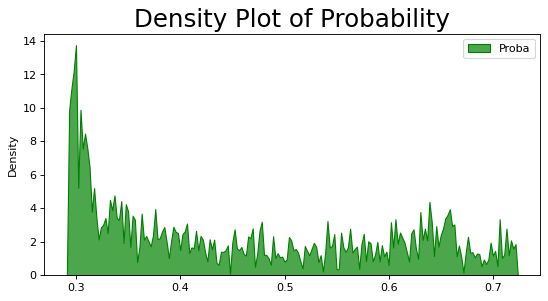

## Two Stage Searching

### Initliazed parameters

,key,value
0,cv,True
1,max_trials,None
2,name,two_stage_searching
3,num_folds,3
4,size,None
5,time_limit,None


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,29,0.866456,8,0.874343,44.116304,29,30


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,8,0.874343,1.820257,"[2, 3, 1, 1, 2, 2, 0]"
1,26,0.874343,1.052660,"[2, 2, 1, 2, 0, 1, 1]"
2,15,0.873817,1.351622,"[2, 1, 0, 3, 1, 2]"
3,25,0.873817,1.359036,"[2, 3, 0, 3, 1, 3]"
4,13,0.872766,2.092232,"[0, 1, 0, 1, 320, 3, 2, 4, 2]"


#### Best Trial:

key,value
signature,697999d4a44fd6f9b39f160ab5ad2fd2
vectors,"[2, 3, 1, 1, 2, 2, 0]"
0-estimator_options.hp_or,2
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_CatBoostEstimator_1.learning_rate,0.01
4-Module_CatBoostEstimator_1.depth,7
5-Module_CatBoostEstimator_1.l2_leaf_reg,10
6-numeric_or_scaler_0.hp_or,0


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,10,0.853365,2,0.876341,58.043301,10,10


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,2,0.876341,2.881248,"[0, 3, 1, 1, 100, 3, 2, 5, 0, 4]"
1,8,0.872345,4.781441,"[0, 3, 1, 1, 115, 3, 3, 5, 1, 4]"
2,10,0.853365,5.911279,"[1, 2, 1, 1, 0, 1, 3, 0, 3, 1, 0]"
3,4,0.834227,3.820261,"[1, 2, 1, 1, 0, 0, 3, 2, 5, 1, 4]"
4,9,0.815983,2.420341,"[1, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0]"


#### Best Trial:

key,value
signature,d01fb5ad72433a5dad53a6b9bcfbb886
vectors,"[0, 3, 1, 1, 100, 3, 2, 5, 0, 4]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,most_frequent
2-numeric_scaler_optional_0.hp_opt,True
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,100
5-Module_LightGBMEstimator_1.max_depth,10
6-Module_LightGBMEstimator_1.learning_rate,0.5
7-Module_LightGBMEstimator_1.reg_alpha,100


### Fitted parameters

,key,value
0,input_features,"[FLength, FWidth, FSize, FConc, FConc1, FAsym,..."
1,best_reward,0.876341
2,history,<hypernets.core.trial.TrialHistory object at 0...


## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.6, 0.0, 0.35, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0..."
1,scores,"[0.8763406940063091, 0.8764458464773922, 0.876..."
2,best_stack,"[0, 2, 0, 0, 2, 0, 0, 2, 6, 0, 2, 0, 2, 0, 0, ..."
3,hits,"{0: 12, 2: 7, 6: 1}"
4,ensemble_size,20


0.7789169295478444

In [6]:
experiment = make_experiment(train_data.copy(),test_data=test_data.copy(), target='Class',
                             random_state=8888,max_trials=10,cv=True,early_stopping_rounds=0,
                             pseudo_labeling=True,
                             pseudo_labeling_proba_threshold=0.5,
                             pseudo_labeling_proba_quantile=0.9,
                             pseudo_labeling_sample_number=0.9,
                             )
estimator = experiment.run()
scorer = get_scorer(metric_to_scoring('accuracy'))
score = scorer(estimator, X_test, y_test)
score